# Метод Зейделя

Number of iterations:  47
Solution:  [ 0.78844473 -0.9755092   0.41335505  0.43553708 -0.03418871  0.03262973
 -0.19348486 -0.34331746]
Python soliton:  [ 0.7884447  -0.97550914  0.41335503  0.43553705 -0.0341887   0.03262972
 -0.19348485 -0.34331743]
Differences 7.909256807733081e-08


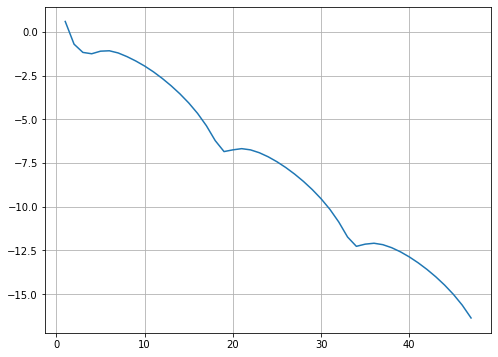

In [32]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

def mv_prod (A, b):
    n = A.shape[1]
    c = np.zeros(n)
    for i in range(n):
        for j in range(n):
            c[i] += A[i][j]*b[j] 
    return c

def solve_ls(A, b):
    xk_next = np.zeros(size)
    discrepancy_l = [np.linalg.norm(mv_prod(A, xk_next) - b)]
    iteration_num = 1
    
    while (np.linalg.norm(mv_prod(A, xk_next) - b) > tol and iteration_num < max_it):
        iteration_num += 1
        xk = np.copy(xk_next)
        for i in range(size):
            xk_next[i] = b[i]
            for j in range(i): 
                xk_next[i] -= A[i, j] * xk_next[j]
            for j in range(i + 1, size):
                xk_next[i] -= A[i, j] * xk[j]
            
            xk_next[i] /= A[i, i]
        discrepancy_l.append(np.linalg.norm(mv_prod(A, xk_next) - b))
    
    return (xk_next, discrepancy_l)
        

size = 8
np.random.seed(0)
L = np.tril(np.random.rand(size, size), 1)
L2 = np.tril(np.random.rand(size, size), 1.5)

A = 2*L + L2 + np.diag(np.random.rand(size)) + np.eye(size)
b = np.array([np.random.rand() for i in range(size)])
tol = 10e-8
max_it = 10e5

solution, residual_list = solve_ls(A, b)

plt.figure(figsize = (8,6))
plt.grid()
plt.plot(range(1, len(residual_list) + 1), [np.log(i) for i in residual_list])

solution_numpy = np.linalg.solve(A, b)
print("Number of iterations: ", len(residual_list))
print("Solution: ", solution)
print("Python soliton: ", solution_numpy)
print("Differences", np.linalg.norm(solution - solution_numpy, 2))